In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

X = iris.data
Y = iris.target

In [12]:
iris_data = DataFrame(X, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y, columns=['class'])

In [13]:
def flower_class(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

In [14]:
iris_target['class'] = iris_target['class'].apply(flower_class) 

In [20]:
iris = pd.concat([iris_data,iris_target],axis=1)

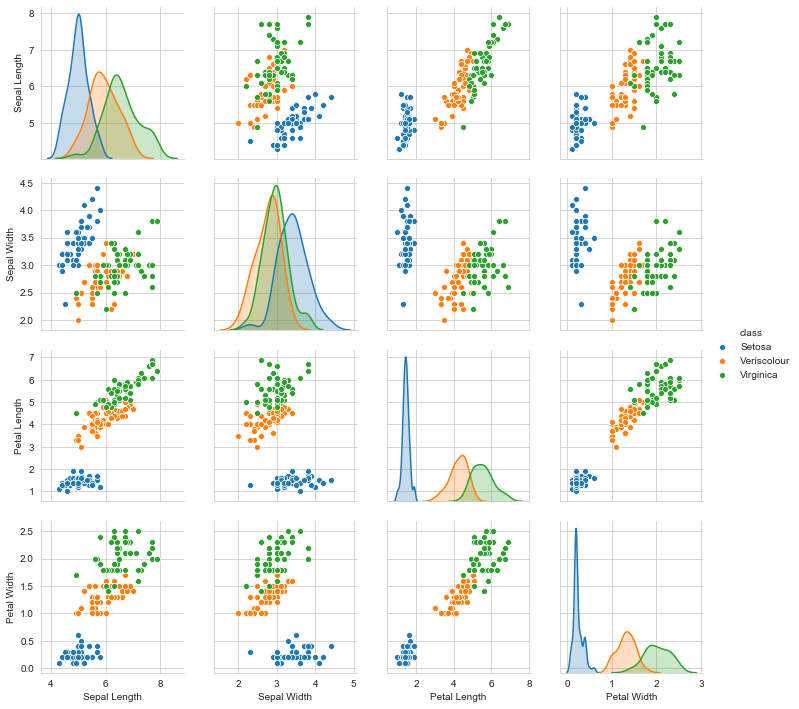

In [24]:
sns.pairplot(iris,hue='class')

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [52]:
log_model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [34]:
log_model.fit(X_train,Y_train)

C:\Users\MLAI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLAI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
Y_pred = log_model.predict(X_test)

In [36]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred_knn))

1.0


Text(0, 0.5, 'Testing Accuracy')

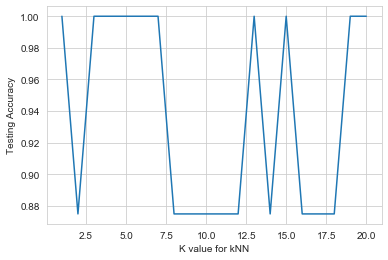

In [70]:
Y_pred_knn_list = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred_knn = knn.predict(X_test)
    Y_pred_knn_list.append(metrics.accuracy_score(Y_test,y_pred_knn))

plt.plot(range(1,21),Y_pred_knn_list)
plt.xlabel('K value for kNN')
plt.ylabel('Testing Accuracy')

Test size: 0.05



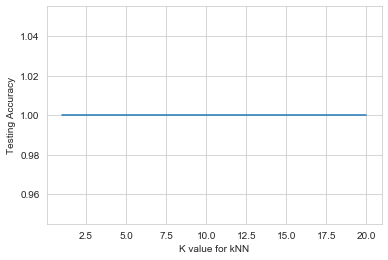

Test size: 0.1



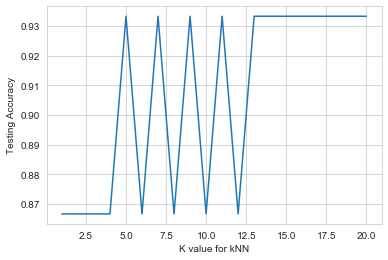

Test size: 0.15



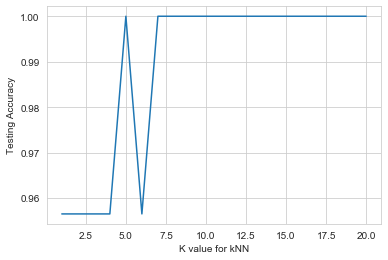

Test size: 0.2



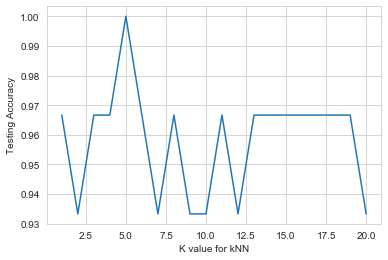

Test size: 0.25



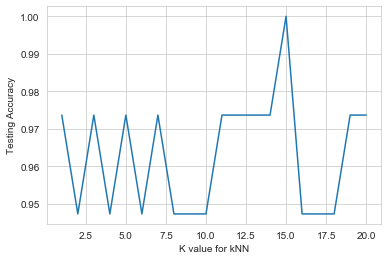

Test size: 0.3



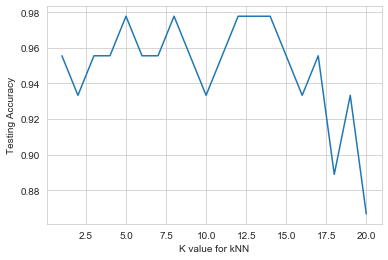

Test size: 0.35



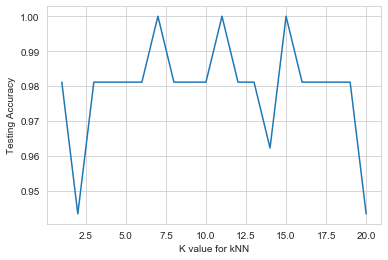

Test size: 0.39999999999999997



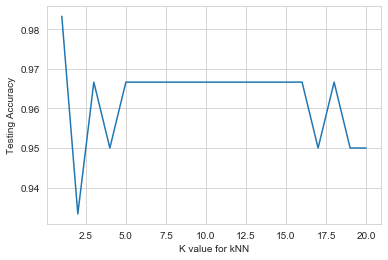

Test size: 0.44999999999999996



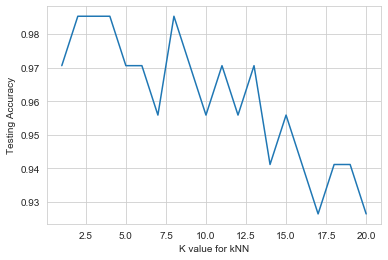

Test size: 0.49999999999999994



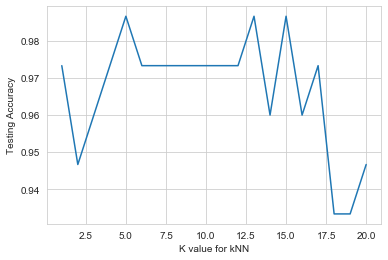

Test size: 0.5499999999999999



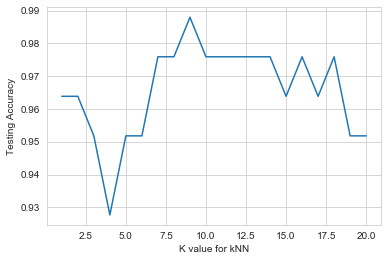

Test size: 0.6



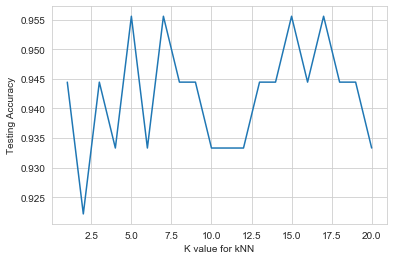

Test size: 0.65



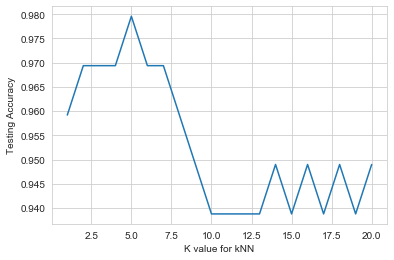

Test size: 0.7



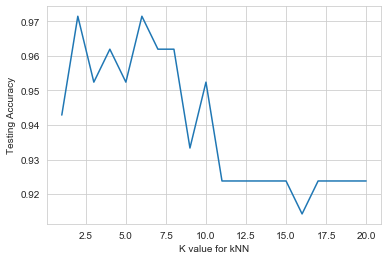

Test size: 0.75



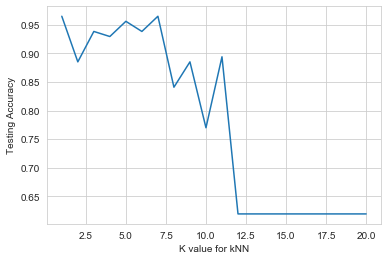

Test size: 0.7999999999999999



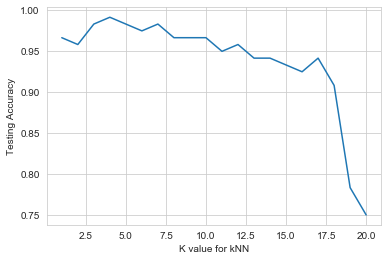

Test size: 0.85



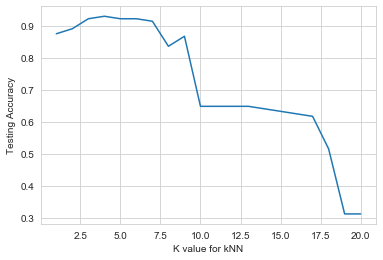

In [78]:
test_size_list = np.linspace(0.05,0.85,17)

for size in test_size_list:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size)
    print('Test size: {}\n'.format(size))
    Y_pred_knn_list = []
    
    for k in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,Y_train)
        y_pred_knn = knn.predict(X_test)
        Y_pred_knn_list.append(metrics.accuracy_score(Y_test,y_pred_knn))
    plt.plot(range(1,21),Y_pred_knn_list)
    plt.xlabel('K value for kNN')
    plt.ylabel('Testing Accuracy')
    plt.show()


array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85])